Importing Libraries 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the Dataset

In [ ]:
Data= pd.read_csv('/content/amazon_alexa.tsv', sep='\t')

Overview of Dataset

In [ ]:
Data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
Data.info

<bound method DataFrame.info of       rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                

In [ ]:
Data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
Data.variation.unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

Exploratory Data Analysis

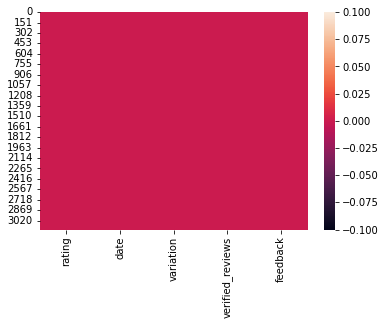

In [ ]:
sns.heatmap(Data.isnull(), cbar=True)

In [ ]:
Data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0ca866b50>,
      dtype=object)

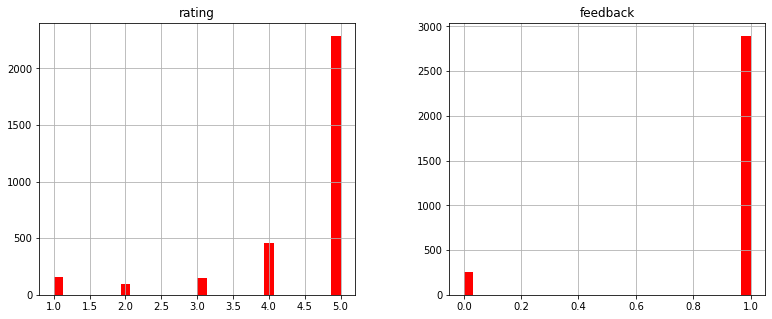

In [ ]:
Data.hist(bins=30, figsize=(13,5), color='r')

In [ ]:
Data['length'] = Data['verified_reviews'].apply(len)
Data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


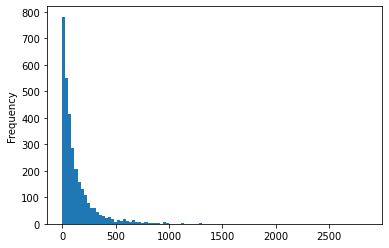

In [ ]:
Data['length'].plot(bins=100, kind='hist')

In [ ]:
Data.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

Craeting a dataframe with Positive Reviews

In [ ]:
positive = Data[Data['feedback'] == 1]

In [ ]:
positive.describe()

,rating,feedback,length
count,2893.000000,2893.0,2893.000000
mean,4.737643,1.0,124.659177
std,0.546544,0.0,174.624491
min,3.000000,1.0,1.000000
25%,5.000000,1.0,29.000000
50%,5.000000,1.0,69.000000
75%,5.000000,1.0,154.000000
max,5.000000,1.0,2851.000000


Creating a dataframe with Negative Reviews 

In [ ]:
negative = Data[Data['feedback'] == 0]

In [ ]:
negative.describe()

,rating,feedback,length
count,257.000000,257.0,257.000000
mean,1.373541,0.0,215.241245
std,0.484688,0.0,236.325955
min,1.000000,0.0,1.000000
25%,1.000000,0.0,53.000000
50%,1.000000,0.0,137.000000
75%,2.000000,0.0,289.000000
max,2.000000,0.0,1686.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


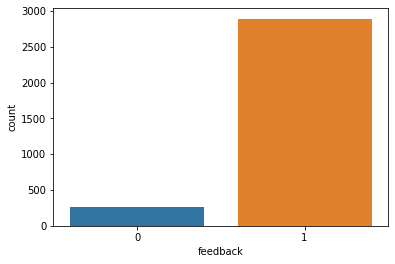

In [ ]:
sns.countplot(Data['feedback'])


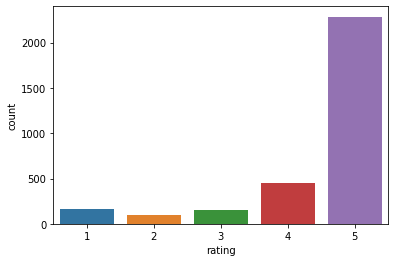

In [ ]:
sns.countplot(x = 'rating', data = Data)

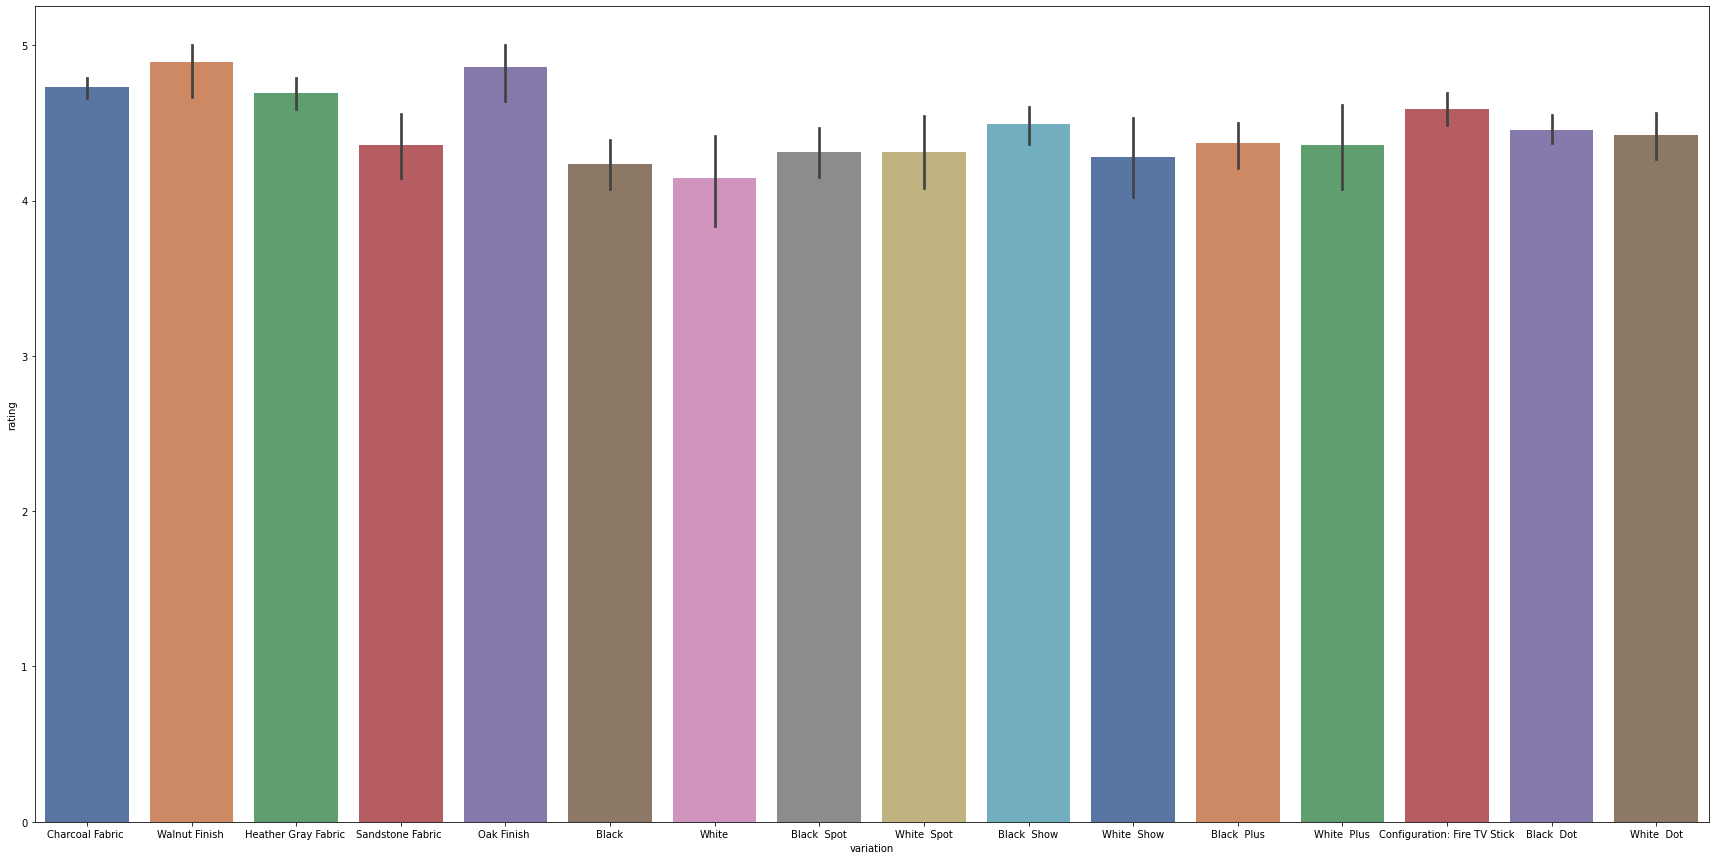

In [ ]:
plt.figure(figsize=(30,15))
sns.barplot(x = 'variation', y = 'rating', data = Data, palette = 'deep')

In [ ]:
sentences = Data['verified_reviews'].tolist()

In [ ]:
sentences_as_one_string = ' '.join(sentences)

Creating a WordCloud

In [ ]:
from wordcloud import WordCloud

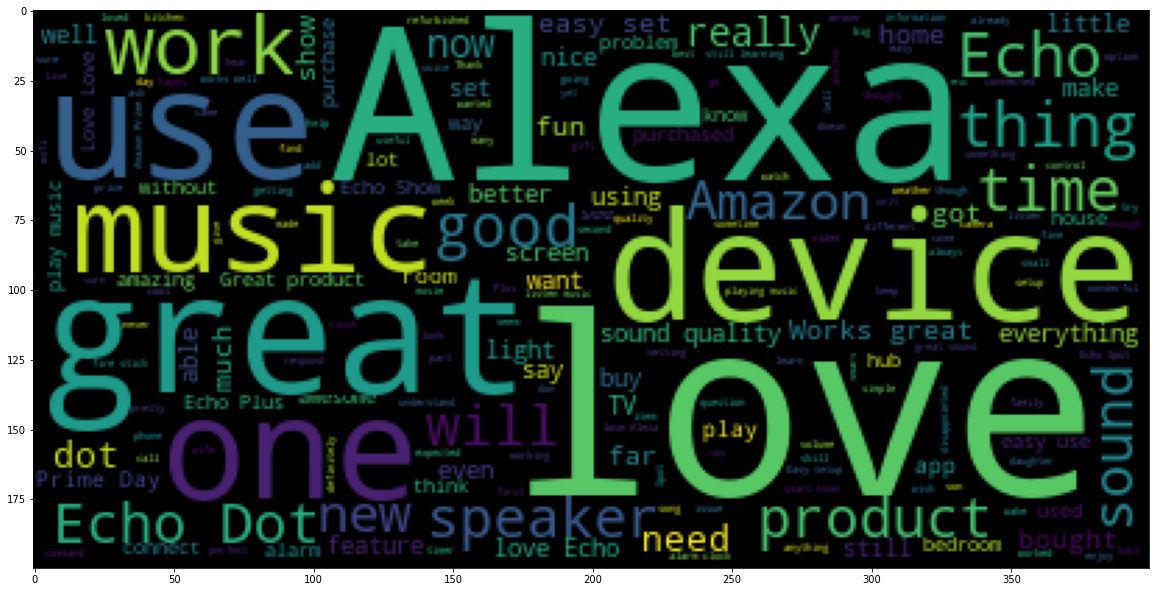

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [ ]:
negative_list = negative['verified_reviews'].tolist()
negative_sentences_as_one_string = ' '.join(negative_list)

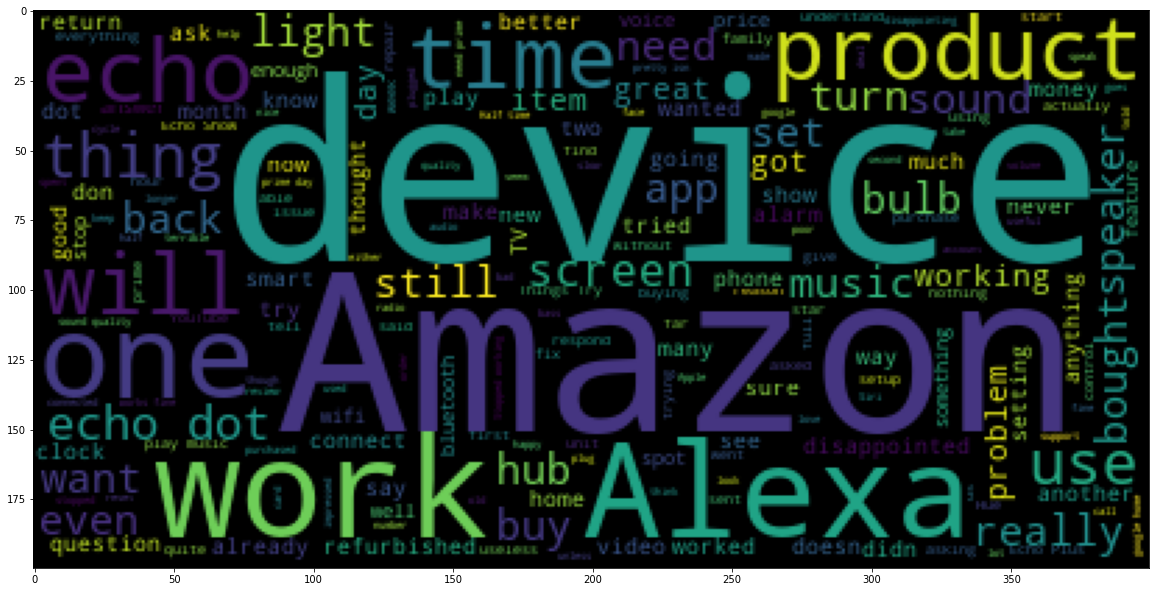

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

Data Cleaning

In [ ]:
Data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:
Data = Data.drop(['date', 'rating', 'length'], axis = 1)
Data.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [ ]:
Data['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [ ]:
Data['variation'].count()

3150

In [ ]:
X_cat = Data[['variation']]

OneHotEncoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehotencoder = OneHotEncoder()

In [ ]:
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [ ]:
type(X_cat)

numpy.ndarray

In [ ]:
X_cat = pd.DataFrame(X_cat)

In [ ]:
Data.drop(['variation'], axis = 1, inplace=True)


In [ ]:
Data.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [ ]:
Data = pd.concat([Data, X_cat], axis = 1)
Data

,verified_reviews,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Love my Echo!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Loved it!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Sometimes while playing a game, you can answer...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,I have had a lot of fun with this thing. My 4 ...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Music,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,"Listening to music, searching locations, check...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,"I do love these things, i have them running my...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,Only complaint I have is that the sound qualit...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


REMOVING PUNCTUATION FROM TEXT

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
test = "You will feel like Tony Stark on this device. I added quite a few Alexa always loads them up quickly. Adding songs that you hear to specific playlists on Amazon Music is also a great feature.I can go on and on and this is only my second day of ownership.I was lucky to buy this for $100 on Prime Day, but I think for $150 is "

In [ ]:
test_punct_removed = [char for char in test if char not in string.punctuation]

In [ ]:
print(test_punct_removed)

['Y', 'o', 'u', ' ', 'w', 'i', 'l', 'l', ' ', 'f', 'e', 'e', 'l', ' ', 'l', 'i', 'k', 'e', ' ', 'T', 'o', 'n', 'y', ' ', 'S', 't', 'a', 'r', 'k', ' ', 'o', 'n', ' ', 't', 'h', 'i', 's', ' ', 'd', 'e', 'v', 'i', 'c', 'e', ' ', 'I', ' ', 'a', 'd', 'd', 'e', 'd', ' ', 'q', 'u', 'i', 't', 'e', ' ', 'a', ' ', 'f', 'e', 'w', ' ', 'A', 'l', 'e', 'x', 'a', ' ', 'a', 'l', 'w', 'a', 'y', 's', ' ', 'l', 'o', 'a', 'd', 's', ' ', 't', 'h', 'e', 'm', ' ', 'u', 'p', ' ', 'q', 'u', 'i', 'c', 'k', 'l', 'y', ' ', 'A', 'd', 'd', 'i', 'n', 'g', ' ', 's', 'o', 'n', 'g', 's', ' ', 't', 'h', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'h', 'e', 'a', 'r', ' ', 't', 'o', ' ', 's', 'p', 'e', 'c', 'i', 'f', 'i', 'c', ' ', 'p', 'l', 'a', 'y', 'l', 'i', 's', 't', 's', ' ', 'o', 'n', ' ', 'A', 'm', 'a', 'z', 'o', 'n', ' ', 'M', 'u', 's', 'i', 'c', ' ', 'i', 's', ' ', 'a', 'l', 's', 'o', ' ', 'a', ' ', 'g', 'r', 'e', 'a', 't', ' ', 'f', 'e', 'a', 't', 'u', 'r', 'e', 'I', ' ', 'c', 'a', 'n', ' ', 'g', 'o', ' ', 'o', 'n', ' ',

In [ ]:
test_punct_removed = ''.join(test_punct_removed)
test_punct_removed

'You will feel like Tony Stark on this device I added quite a few Alexa always loads them up quickly Adding songs that you hear to specific playlists on Amazon Music is also a great featureI can go on and on and this is only my second day of ownershipI was lucky to buy this for 100 on Prime Day but I think for 150 is '

Removing Stopwords

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
test_punct_stop_removed = [word for word in test_punct_removed.split() if word.lower() not in stopwords.words('english')]

In [ ]:
test_punct_stop_removed

['feel',
 'like',
 'Tony',
 'Stark',
 'device',
 'added',
 'quite',
 'Alexa',
 'always',
 'loads',
 'quickly',
 'Adding',
 'songs',
 'hear',
 'specific',
 'playlists',
 'Amazon',
 'Music',
 'also',
 'great',
 'featureI',
 'go',
 'second',
 'day',
 'ownershipI',
 'lucky',
 'buy',
 '100',
 'Prime',
 'Day',
 'think',
 '150']

Using Counter Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sample_data = ['This is the first document.', 'This document is the second document.', 'And this is the third one.', 'Is this the first document?']

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [ ]:
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [ ]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


Cleaning Text Pipeline

In [ ]:

def msg_cleaning(message):
    text = [char for char in message if char not in string.punctuation]
    text = ''.join(text)
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return text

In [ ]:
Data_clean = Data['verified_reviews'].apply(msg_cleaning)

In [ ]:
print(Data_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [ ]:
print(Data['verified_reviews'][3])

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


Vectorizing In The New Dataframe 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=msg_cleaning)
Data_count_vect = vectorizer.fit_transform(Data['verified_reviews'])

In [ ]:
len(vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


5211

Applying to the original Dataframe

In [ ]:
Data.drop(['verified_reviews'], axis = 1, inplace = True)

In [ ]:
Data

,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
review = pd.DataFrame(Data_count_vect.toarray())
type(review)

pandas.core.frame.DataFrame

In [ ]:
Data= pd.concat([Data, review], axis = 1)
Data

,feedback,0,1,2,3,4,5,6,7,8,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Craeting X and Y

In [ ]:
X = Data.drop(["feedback"],axis = 1)
Y = Data['feedback']

In [ ]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

Navie Bayes Method 

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
Y_pred = naive_bayes.predict(X_test)

In [ ]:
accuracy_score(Y_test, Y_pred)

0.9253968253968254

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 18,  36],
       [ 11, 565]])

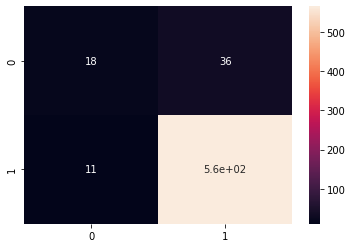

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.33      0.43        54
           1       0.94      0.98      0.96       576

    accuracy                           0.93       630
   macro avg       0.78      0.66      0.70       630
weighted avg       0.91      0.93      0.91       630



Logistic Regression Method 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_pred = logistic.predict(X_test)

In [ ]:
accuracy_score(Y_test, Y_pred)

0.9492063492063492

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.44      0.60        54
           1       0.95      1.00      0.97       576

    accuracy                           0.95       630
   macro avg       0.94      0.72      0.79       630
weighted avg       0.95      0.95      0.94       630

